In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris_df.shape

(150, 4)

In [9]:
# предварительная обработка данных

In [10]:
# применим нормализацию данных

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df)

iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)

iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


In [16]:
# EDA и отбор признаков

In [17]:
X = iris_df_scaled

In [18]:
# обучение модели

In [19]:
from sklearn.cluster import KMeans

#создадим пустой список для записи показателей WCSS (нашей ошибки)

wcss = []

# воспользуемся функцией range

for i in range(1, 11):

    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

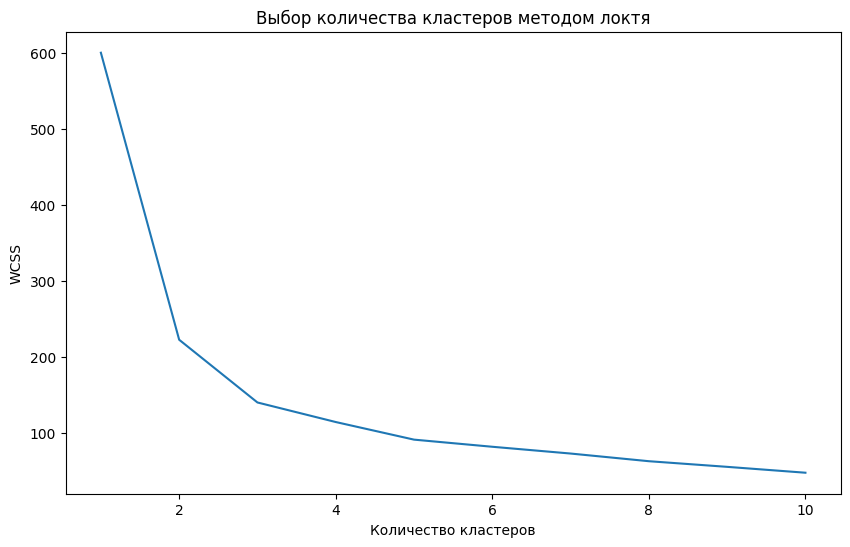

In [20]:
plt.figure(figsize=(10,6))
# передадим функции plot() последовательность кластеров и ошибку wcss
plt.plot(range(1,11), wcss)
# добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [21]:
# Как видно на графике, когда мы перешли от трех до четырех кластеров, ошибка перестала существенно уменьшаться (это согласуется с тем, что видом действительно три).

In [22]:
# заново обучим модель с тремя кластерами
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [ ]:
# n_clusters: это количество кластеров, на которые мы хотим разбить наши наблюдения
# init: определяет, как мы выберем первоначальное расположение (инициализацию) центроидов; есть два варианта, (1) выбрать центроиды случайно init = 'random' или (2) выбрать их так, чтобы центроиды с самого начала располагались максимально далеко друг от друга init = 'k-means++'; второй вариант оптимальнее
# n_init: сколько раз алгоритм будет инициализирован, т.е. сколько раз будут выбраны центроиды до начала оптимизации; на выходе будет выбран тот вариант, где ошибка была минимальна
# max_iter: максимальное количество итераций алгоритма после первоначального выбора центроидов
# random_state: воспроизводимость результата, с этим мы уже знакомы

In [23]:
# обучение и прогноз / в данном случае можно сдлеать одним методом / fit_predict()

In [24]:
y_pred = kmeans.fit_predict(X)

In [29]:
# оценка качества модели
# С помощью функции where() создадим массив Numpy, в котором сравним каждую строчку датафрейма, и если целевая переменная и прогноз совпадают, зададим значение True, в противном случае — False.

In [26]:
# поместим переменные в словарь
d = {'Target' : iris.target, 'Prediction' : y_pred}
 
# превратим словарь в датафрейм с соответствующими названиями столбцов
df = pd.DataFrame(d, columns = ['Target', 'Prediction'])

In [45]:
comparison = np.where(df['Target'] == df['Prediction'], False, True)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [41]:
df['Comparision'] = comparison

In [42]:
df.head()

,Target,Prediction,Comparision
0,0,1,True
1,0,1,True
2,0,1,True
3,0,1,True
4,0,1,True


In [43]:
# Выведем долю совпавших (True) и не совпавших (False) значений. 
# Для этого используем функцию value_counts(), которая подсчитает, сколько раз встречается каждое значение. 
# Параметр normalize = True вернет относительное значение или процент. Ровно это нам и нужно.

In [44]:
df['Comparision'].value_counts(normalize=True).round(2)

Comparision
True     0.76
False    0.24
Name: proportion, dtype: float64

In [46]:
# В исходном датафрейме четыре признака, а значит четыре измерения, столько мы представить графически не можем. Давайте возьмем первый (sepal length) и второй (sepal width) столбец исходного датафрейма.

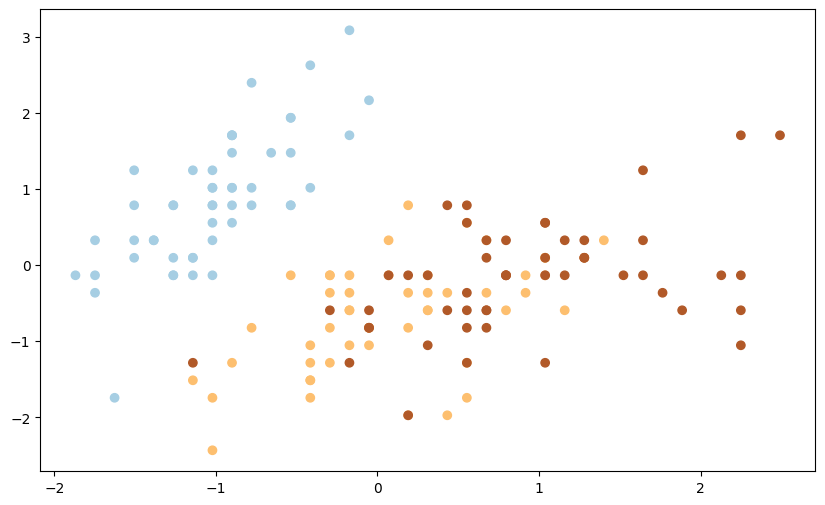

In [47]:
plt.figure(figsize=(10,6))

# возьмем первый и второй столбцы с помощью функции iloc()
# параметр с задаст каждой точке определенный код (0, 1, 2), а
# camp определит цвет каждой из точек
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = iris.target, cmap = 'Paired')

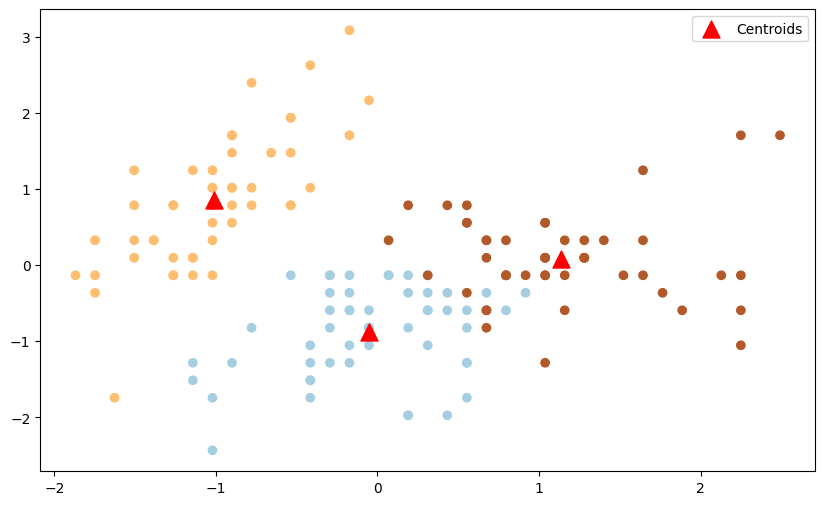

In [53]:
# посмотрим на результат алгоритма кластеризации

plt.figure(figsize=(10,6))

# построим точечную диграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,0],X.iloc[:,1], c = y_pred, cmap='Paired')

# введем центроиды с помощью атрибута cluster_centers
# зададим размер s = 150, красный цвет с = 'red', тип маркера - треугольник, и подпись

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 150, c = 'red', marker='^', label = 'Centroids')

# укажем где разместить легенду

plt.legend(loc='upper right')